In [5]:
import numpy as np 
from sklearn import cluster, datasets 
from scipy import misc 
import scipy as sp
import matplotlib.pyplot as plt
from scipy.misc import face
face = face(gray=True)


In [6]:
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

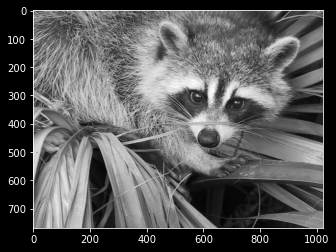

In [12]:
plt.style.use('dark_background')
plt.imshow(face, cmap=plt.cm.gray)

In [13]:
#Creating the X Array
X = face.reshape((-1, 1))

In [14]:
#Fitting the K-Means Algorithm on the X Variable
n_clusters = 5
np.random.seed(0)
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
k_means.fit(X)

KMeans(n_clusters=5, n_init=4)

In [17]:
values = k_means.cluster_centers_.squeeze() #Values will store the actual value of the labels 0, 1, 2, 3, and 4.
labels = k_means.labels_ #Labels will attribute each element of the data points in X to one of the 5 labels = 0, 1, 2, 3, or 4.

In [16]:
values

array([111.62805703,  27.11166441, 192.8878986 ,  73.35388722,
       150.24313581])

In [22]:
#Compressed Face from the labels and values
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

In [23]:
vmin = face.min()
vmax = face.max()

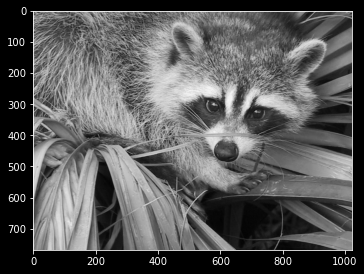

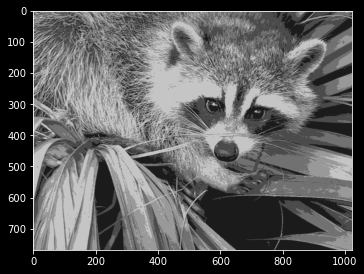

In [24]:
#Plotting the Original and Compressed Face
plt.figure(1, figsize=(6, 4.4))
plt.imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=256)
plt.figure(2, figsize=(6, 4.4))
plt.imshow(face_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

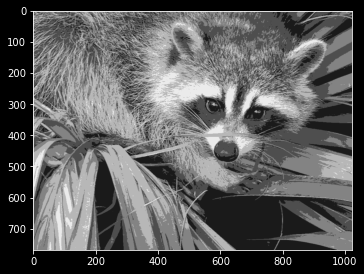

In [28]:
#Plotting the Regular Face
regular_values = np.linspace(0, 256, n_clusters + 1)
regular_values = np.linspace(0, 256, n_clusters + 1)
regular_labels = np.searchsorted(regular_values, face) - 1
regular_values = .5 * (regular_values[1:] + regular_values[:-1])  # mean
regular_face = np.choose(regular_labels.ravel(), regular_values, mode="clip")
regular_face.shape = face.shape
plt.figure(3, figsize=(6, 4.4))
plt.imshow(regular_face, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)